In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

from src.load_covid19 import load_clean_covid19
import pandas as pd

In [2]:
df = load_clean_covid19()

Dataset already exists at /home/philipp/Dokumente/Master_Data_Science_Fernuni_Hagen/Projektpraktikum_Web_Science/covid-19-risiko-erkennung/src/../data/raw/covid19-dataset. Skipping download.
Saving clean dataset to: /home/philipp/Dokumente/Master_Data_Science_Fernuni_Hagen/Projektpraktikum_Web_Science/covid-19-risiko-erkennung/data/interim/covid-data-clean.csv
Saved
Loading clean dataset from: /home/philipp/Dokumente/Master_Data_Science_Fernuni_Hagen/Projektpraktikum_Web_Science/covid-19-risiko-erkennung/data/interim/covid-data-clean.csv


In [3]:
df.dtypes

USMER                      int64
MEDICAL_UNIT               int64
SEX                     category
PATIENT_TYPE            category
INTUBED                  boolean
PNEUMONIA                boolean
AGE                        int64
PREGNANT                 boolean
DIABETES                 boolean
COPD                     boolean
ASTHMA                   boolean
INMSUPR                  boolean
HIPERTENSION             boolean
OTHER_DISEASE            boolean
CARDIOVASCULAR           boolean
OBESITY                  boolean
RENAL_CHRONIC            boolean
TOBACCO                  boolean
CLASIFFICATION_FINAL       int64
ICU                      boolean
DIED                     boolean
dtype: object

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

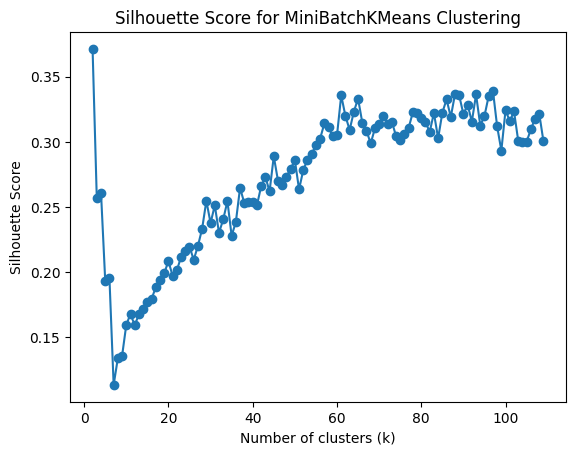

In [11]:
# Load your dataframe (replace 'df' with your actual dataframe)
# df = pd.read_csv('your_data.csv')

df_sample = df.sample(frac=0.01, random_state=42)

# Encode categorical variables
df_encoded = df_sample.copy()
label_encoders = {}
for col in df_sample.select_dtypes(include=['category', 'boolean']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_sample[col])
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

k_values = range(2, 110)
silhouette_scores = []

from IPython.display import clear_output

# Initialize the plot

# Create the initial plot
plt.figure(figsize=(10, 6))

for k in k_values:
    # Perform clustering
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
    labels = minibatch_kmeans.fit_predict(df_scaled)
    
    # Calculate the silhouette score for the current k
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)
    
    # Clear previous output and plot the updated data
    clear_output(wait=True)  # Clears the output to display the updated plot
    plt.plot(list(k_values)[:len(silhouette_scores)], silhouette_scores, marker='o')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score for MiniBatchKMeans Clustering")
    plt.show()
    

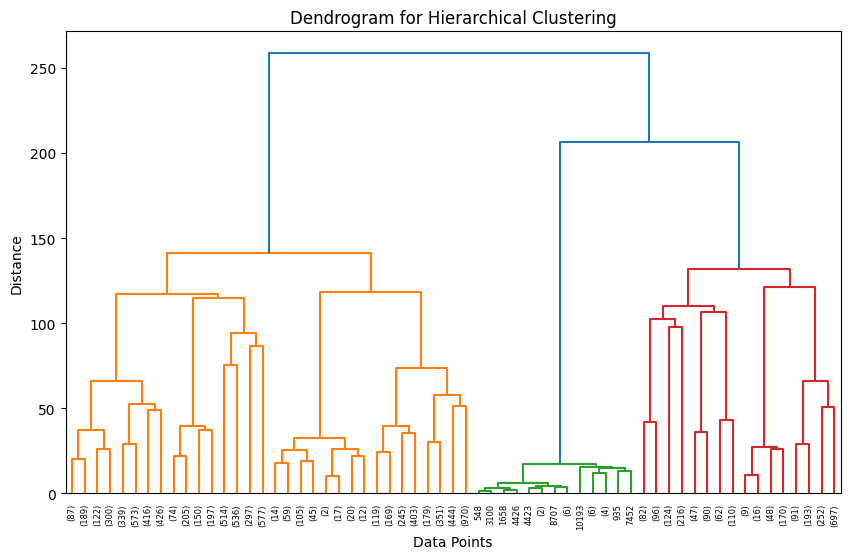

In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Create linkage matrix for dendrogram
linkage_matrix = linkage(df_scaled, method='ward')  # 'ward' minimizes variance within clusters

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)  # truncate to show top levels
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()


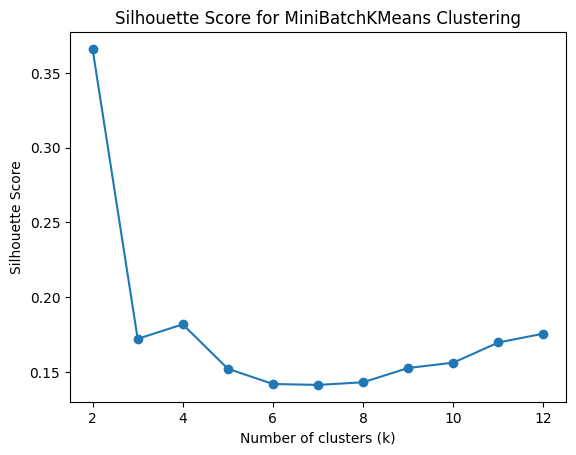

KeyboardInterrupt: 

In [14]:
# Load your dataframe (replace 'df' with your actual dataframe)
# df = pd.read_csv('your_data.csv')
from sklearn.cluster import KMeans
df_sample = df.sample(frac=0.1, random_state=42)

# Encode categorical variables
df_encoded = df_sample.copy()
label_encoders = {}
for col in df_sample.select_dtypes(include=['category', 'boolean']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_sample[col])
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

k_values = range(2, 11)
silhouette_scores = []

from IPython.display import clear_output

# Initialize the plot

# Create the initial plot
plt.figure(figsize=(10, 6))

for k in k_values:
    # Perform clustering
    minibatch_kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = minibatch_kmeans.fit_predict(df_scaled)
    
    # Calculate the silhouette score for the current k
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)
    
    # Clear previous output and plot the updated data
    clear_output(wait=True)  # Clears the output to display the updated plot
    plt.plot(list(k_values)[:len(silhouette_scores)], silhouette_scores, marker='o')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score for MiniBatchKMeans Clustering")
    plt.show()

In [17]:
import numpy as np
# Fit KMeans with k=2
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Find the most representative example for each cluster
representative_examples = {}
for cluster in range(2):
    # Get indices of data points belonging to the current cluster
    cluster_indices = np.where(labels == cluster)[0]
    
    # Calculate the Euclidean distance from each point in the cluster to its centroid
    distances = np.linalg.norm(df_scaled[cluster_indices] - centroids[cluster], axis=1)
    
    # Get the index of the closest point within the cluster
    closest_index = cluster_indices[np.argmin(distances)]
    
    # Retrieve the original data point from df as a representative example
    representative_examples[cluster] = df.iloc[closest_index]

# Display representative examples for each cluster
for cluster, example in representative_examples.items():
    print(f"Representative example for cluster {cluster}:\n", example, "\n")


Representative example for cluster 0:
 USMER                                 2
MEDICAL_UNIT                          4
SEX                                male
PATIENT_TYPE            hospitalization
INTUBED                           False
PNEUMONIA                          True
AGE                                  72
PREGNANT                           <NA>
DIABETES                          False
COPD                              False
ASTHMA                            False
INMSUPR                           False
HIPERTENSION                      False
OTHER_DISEASE                     False
CARDIOVASCULAR                    False
OBESITY                           False
RENAL_CHRONIC                     False
TOBACCO                           False
CLASIFFICATION_FINAL                  3
ICU                               False
DIED                               True
Name: 49131, dtype: object 

Representative example for cluster 1:
 USMER                               1
MEDICAL_UNIT   